In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

In [2]:
#df = pd.read_csv('data/structured_data.csv', parse_dates=[3])
df = pd.read_csv('data/metadata_0108.csv', parse_dates=[3])
df["day"] = df["date"].apply(lambda x: x.day_name())
df["hour"] = df["date"].apply(lambda x: x.hour)
df["month"] = df["date"].apply(lambda x: x.month_name())
df["week"] = df["date"].apply(lambda x: x.week)
#df.head()

df = df.loc[df["date"] >= pd.to_datetime('2022-07-23 00:00:00')]
df.shape

(5292, 40)

In [3]:
#counts = df.loc[df["probability_1_value"] > 0.9].value_counts(["hour", "probability_1_class"]).sort_index()[0]
#counts

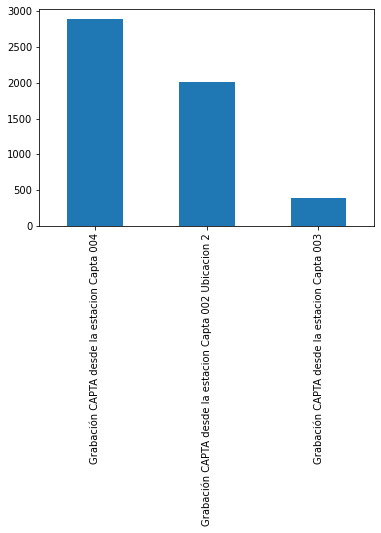

In [4]:
fig, ax = plt.subplots(facecolor='w')
df["description"].value_counts().plot(kind='bar', ax=ax);

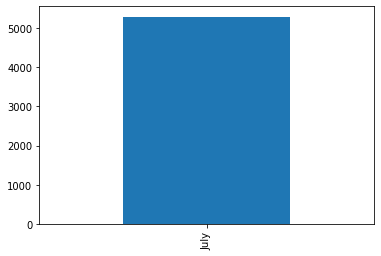

In [5]:
fig, ax = plt.subplots(facecolor='w')
df["month"].value_counts().plot(kind='bar', ax=ax);

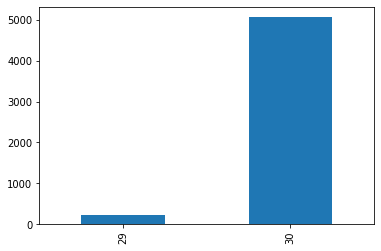

In [6]:
fig, ax = plt.subplots(facecolor='w')
df["week"].value_counts().sort_index().plot(kind='bar', ax=ax);

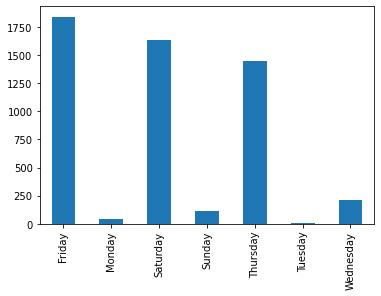

In [7]:
fig, ax = plt.subplots(facecolor='w')
df["day"].value_counts().sort_index().plot(kind='bar', ax=ax);

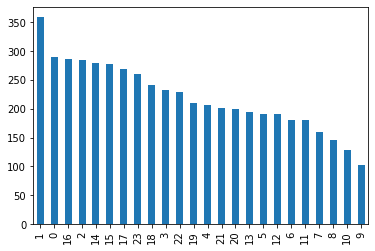

In [8]:
fig, ax = plt.subplots(facecolor='w')
df["hour"].value_counts().plot(kind='bar', ax=ax);

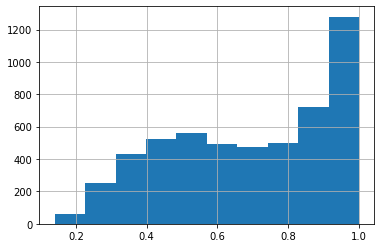

In [9]:
fig, ax = plt.subplots(facecolor='w')
df["probability_1_value"].hist(ax=ax);

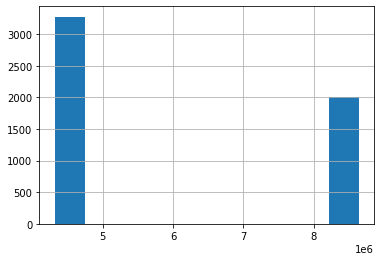

In [10]:
fig, ax = plt.subplots(facecolor='w')
df["size"].hist(ax=ax);

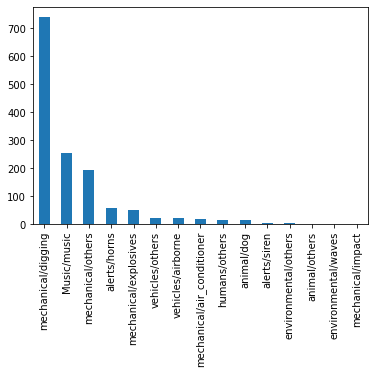

In [11]:
fig, ax = plt.subplots(facecolor='w')
df["probability_1_class"].loc[df["probability_1_value"] > 0.9].value_counts().plot(kind='bar', ax=ax);

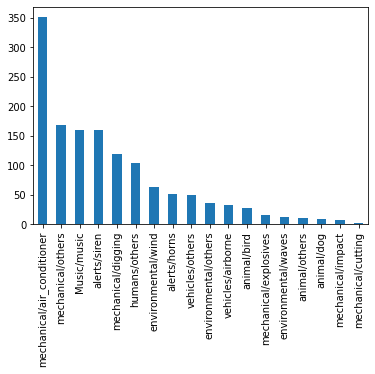

In [12]:
fig, ax = plt.subplots(facecolor='w')
df["probability_1_class"].loc[df["probability_1_value"] < 0.5].value_counts().plot(kind='bar', ax=ax);

**Primer criterio:** X ejemplos de cada estación con probabilidad menor a 0.5

90


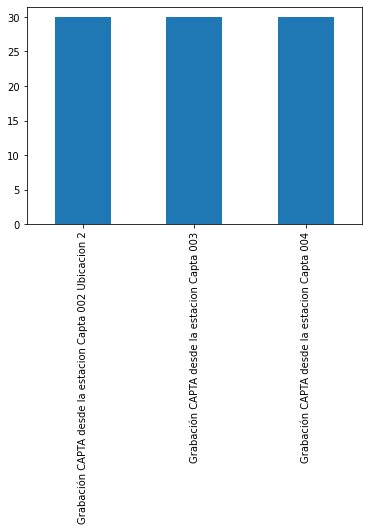

In [13]:
sample_if_large = lambda x, N: x.sample(n=N, random_state=1234) if len(x)>N else x
from functools import partial

sub_df1 = df.loc[df["probability_1_value"]<0.5].groupby(by=['description']).apply(partial(sample_if_large, N=30))
print(len(sub_df1))

fig, ax = plt.subplots(facecolor='w')
sub_df1["description"].value_counts().plot(kind='bar', ax=ax);

**Segundo criterio:** X ejemplos para cada par dia/hora con probabilidad menor a 0.5

417


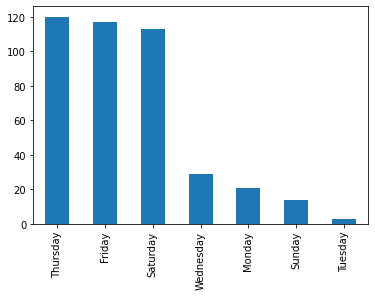

In [14]:
sample_if_large = lambda x, N: x.sample(n=N, random_state=1234) if len(x)>N else x
from functools import partial

sub_df2 = df.loc[df["probability_1_value"]<0.5].groupby(by=['day', 'hour']).apply(partial(sample_if_large, N=5))
print(len(sub_df2))

fig, ax = plt.subplots(facecolor='w')
sub_df2["day"].value_counts().plot(kind='bar', ax=ax);

**Tercer criterio:** X ejemplos de cada estación con probabilidad mayor a 0.8

90


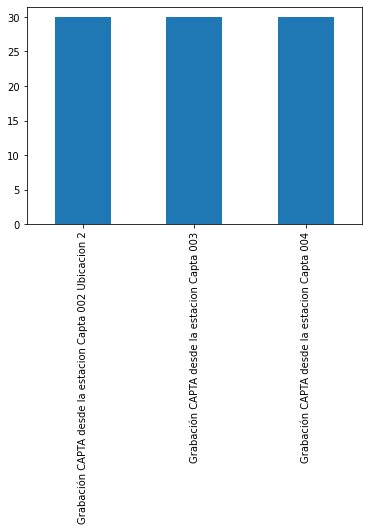

In [15]:
sub_df4 = df.loc[df["probability_1_value"]>0.8].groupby(by=['description']).apply(partial(sample_if_large, N=30))
print(len(sub_df4))

fig, ax = plt.subplots(facecolor='w')
sub_df4["description"].value_counts().plot(kind='bar', ax=ax);

**Cuarto criterio:** X ejemplos de cada clase con probabilidad mayor a 0.8

383


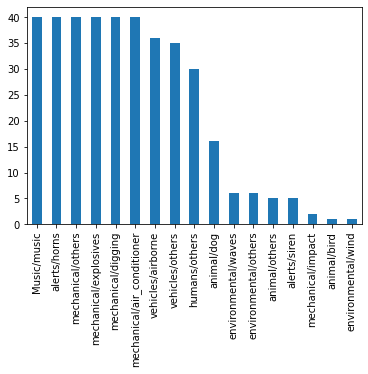

In [16]:
sub_df3 = df.loc[df["probability_1_value"]>0.8].groupby(by=['probability_1_class']).apply(partial(sample_if_large, N=40))
print(len(sub_df3))

fig, ax = plt.subplots(facecolor='w')
#sub_df["description"].value_counts().plot(kind='bar', ax=ax);
sub_df3["probability_1_class"].value_counts().plot(kind='bar', ax=ax);

Se combinan todos las muestras y se eliminan los duplicados:

In [17]:
len(sub_df1) + len(sub_df2) + len(sub_df3) + len(sub_df4)

980

In [18]:
mega_df = pd.concat([sub_df1.set_index('_id'), 
                     sub_df2.set_index('_id'),
                     sub_df3.set_index('_id'),
                     sub_df4.set_index('_id')])

mega_df = mega_df[~mega_df.index.duplicated(keep='first')]
mega_df.to_csv('subsample_0108.csv')
len(mega_df)

898